In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train[0]

9

In [ ]:
class_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [ ]:
class_names[(y_train[0])]

'Ankle Boot'

In [ ]:
X_train=X_train.reshape(60000,28,28,1)

In [ ]:
X_test=X_test.reshape(10000,28,28,1)

In [ ]:
X_train_n=X_train/255.
X_test=X_test/255.

In [ ]:
X_train,X_valid=X_train_n[6000:],X_train_n[:6000]
y_train,y_valid=y_train[6000:],y_train[:6000]

In [ ]:
np.random.seed(28)
tf.random.set_seed(28)

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 200)               1081800   
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [ ]:
keras.utils.plot_model(model)

In [ ]:
weights,bias=model.layers[1].get_weights()

In [ ]:
print(weights,'\n\n',weights.shape)

In [ ]:
print(bias,'\n\n',bias.shape)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
model_history=model.fit(X_train,y_train,epochs=60,validation_data=(X_valid,y_valid))

In [ ]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
model_history.history

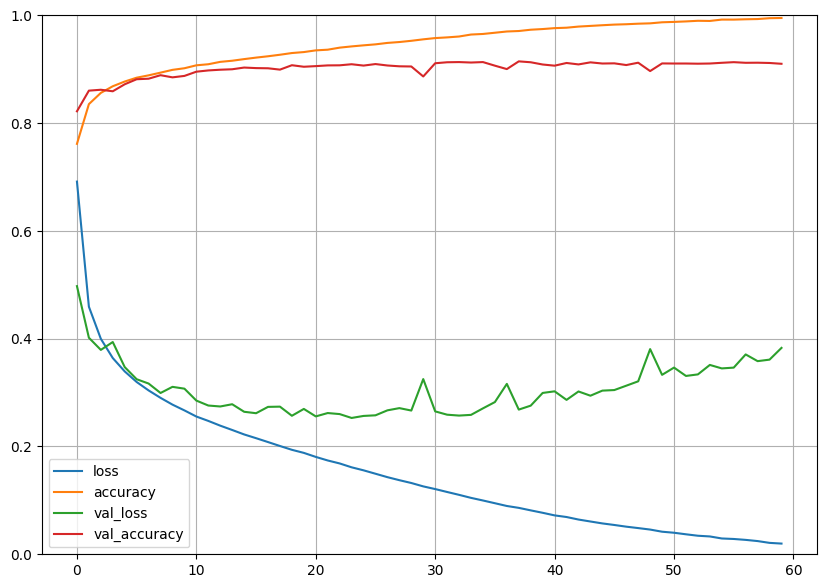

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.4176 - accuracy: 0.9128


[0.41764092445373535, 0.9128000140190125]

In [ ]:
model_b=keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='valid',input_shape=(28,28,1)))
model_b.add(keras.layers.MaxPooling2D((2,2)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(200,activation='relu'))
model_b.add(keras.layers.Dense(100,activation='relu'))
model_b.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model_b.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
model_b_history=model_b.fit(X_train,y_train,epochs=60,validation_data=(X_valid,y_valid))

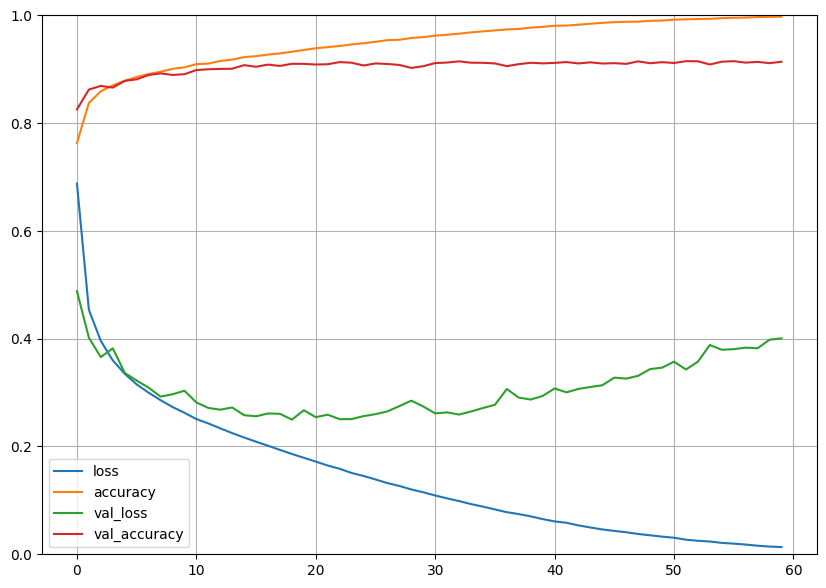

In [ ]:
pd.DataFrame(model_b_history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model_b.evaluate(X_test,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.4123 - accuracy: 0.9123


[0.41227349638938904, 0.9122999906539917]